In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-3602 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442363598.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 219487 observations with 29260 users and 64 items.
PROGRESS:     Data prepared in: 0.116098s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [30]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 219487 observations with 29260 users and 64 items.
PROGRESS:     Data prepared in: 0.105005s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [31]:
vm.testing_rmse(models, training_df)

{'downhill': 0.50244516899580638,
 'total': 0.37912590653713302,
 'uphill': 0.23386948236213351}

In [32]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,-0.786418,-0.116298,-0.269139
seg_distance,-0.186290,-0.099696,-0.217801
seg_maximum_grade,-0.186947,0.010428,-0.125536
total_rating,1.000000,0.635865,0.731413
uphill_rating,0.635865,1.000000,NaN
downhill_rating,0.731413,NaN,1.000000


In [33]:
lb = r.Leaderboards(training_df, segment_ratings)
lb.get(athlete_ratings)

{'downhill_rating':       athlete_id  downhill_rating
 rank                             
 1        1979656       100.000000
 2         738400        98.910683
 3        6402962        98.016229
 4         430937        98.004726
 5        7694023        96.750973
 6         133010        96.084514
 7        2452782        95.688832
 8         864611        95.052604
 9         371689        94.764085
 10        116713        94.595272
 11       2465130        94.547520
 12        390108        93.932666
 13       3442221        93.709338
 14        144290        93.348944
 15       5767339        92.971763
 16       7735123        92.430547
 17       1326619        92.156787
 18           627        92.140550
 19        185715        91.724976
 20          9042        91.540415,
 'total_rating':       athlete_id  total_rating
 rank                          
 1        8531353    100.000000
 2        1794874     98.225943
 3           5165     96.209881
 4         259304     95.604432
 5

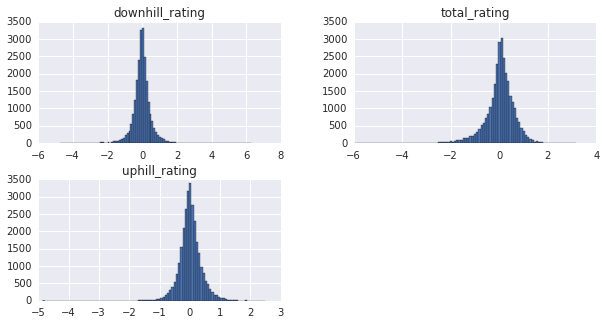

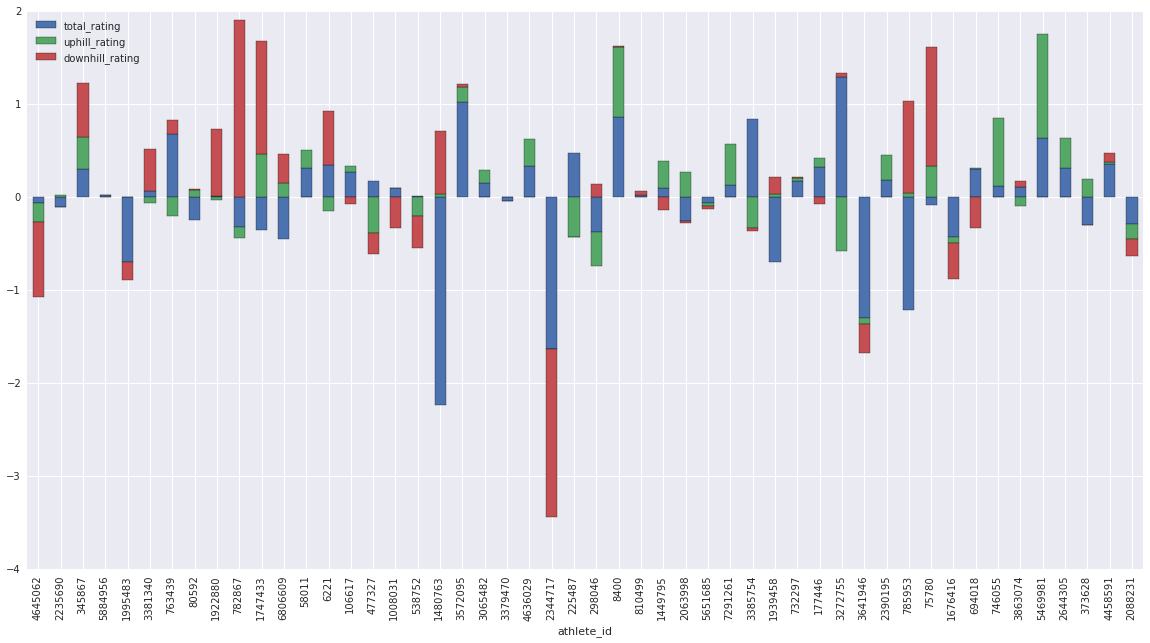

In [34]:
vm.plot_ratings(athlete_ratings)

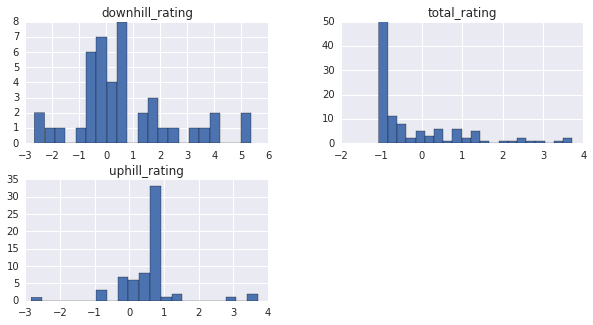

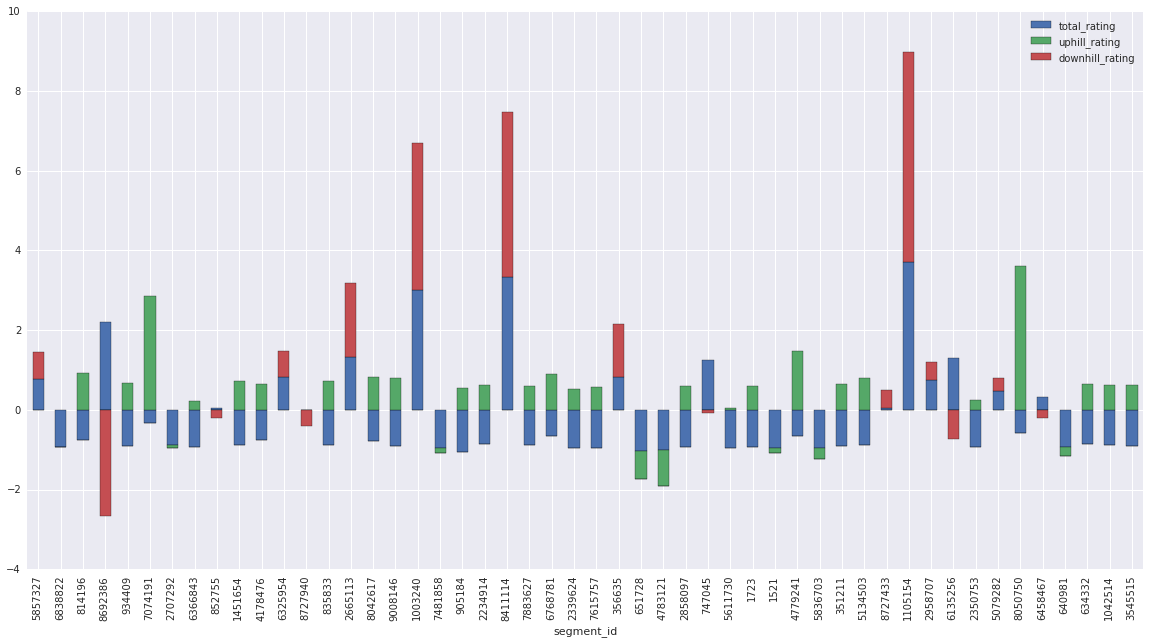

In [35]:
vm.plot_ratings(segment_ratings)

In [36]:
check_column = 'total_rating'
athletes = athlete_ratings[pd.notnull(athlete_ratings[check_column])].index
scaled_ratings_column = athlete_ratings.ix[athletes][check_column]
np.corrcoef(scaled_ratings_column, df.groupby('athlete_id').mean().average_speed[athletes].values)

array([[ 1.      ,  0.026486],
       [ 0.026486,  1.      ]])

In [37]:
df.head()

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff,average_speed
0,331.9,False,424.3,104,104,695503,7481858,95992567,8,418.8,811.2,844.6,14.3,2004-06-19 17:45:53,False,False,-5.5,4.079808
1,158.5,False,438.5,196,196,5998,7481858,131107434,8,418.8,811.2,844.6,14.3,2005-07-02 09:36:52,False,False,-19.7,2.237245
2,248.7,False,418.9,124,124,2743,7481858,74548310,8,418.8,811.2,844.6,14.3,2005-07-03 10:42:46,False,False,-0.1,3.378226
3,273.5,False,423.0,150,150,5287,7481858,232590010,8,418.8,811.2,844.6,14.3,2005-07-27 10:58:13,False,True,-4.2,2.820000
4,430.4,False,401.7,88,88,69915,7481858,40097060,8,418.8,811.2,844.6,14.3,2005-08-05 13:08:39,False,True,17.1,4.564773
